# Sigmoid Activation Function - From Scratch

## Question 14: Compare Activation Functions Mathematically and Visually

---

### 🧩 Problem Statement

**What problem is being solved?**
- Neural networks need activation functions to introduce non-linearity
- Without them, networks would be simple linear models
- Sigmoid squashes any real number to range (0, 1)

**Why it matters:**
- Output can be interpreted as probability
- Used in binary classification
- Foundation for understanding modern activations

---

### 🪜 Steps to Solve

1. Implement sigmoid function from scratch
2. Implement sigmoid derivative
3. Create visualizations
4. Perform numerical analysis
5. Analyze vanishing gradient problem

---

### 🎯 Expected Output

- Sigmoid formula: σ(z) = 1 / (1 + e^(-z))
- Output range: (0, 1)
- Maximum gradient: 0.25 at z=0

---

## Step 1: Import Libraries

### 🔹 Line Explanation: `import numpy as np`

#### 2.1 What the line does
Imports the NumPy library and assigns it alias 'np'.

#### 2.2 Why it is used
NumPy provides efficient array operations and mathematical functions like `np.exp()`. This is the standard way in Python for numerical computing. Alternative: pure Python math module, but NumPy is faster for arrays.

#### 2.3 When to use it
Always when working with numerical data, arrays, or mathematical operations.

#### 2.4 Where to use it
Machine learning, data science, scientific computing, image processing.

#### 2.5 How to use it
```python
import numpy as np
arr = np.array([1, 2, 3])
```

#### 2.6 How it works internally
NumPy loads compiled C code that performs vectorized operations on arrays, much faster than Python loops.

#### 2.7 Output
No visible output - just makes NumPy available as `np`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

## Step 2: Implement Sigmoid Function

### 🔹 Line Explanation: `return 1 / (1 + np.exp(-z))`

#### 2.1 What the line does
Computes the sigmoid activation: σ(z) = 1 / (1 + e^(-z))

#### 2.2 Why it is used
Squashes any real number to range (0, 1). This is the only formula for sigmoid - no alternatives exist. It's mathematically derived from the logistic function.

#### 2.3 When to use it
Binary classification output layer, logistic regression, gate mechanisms in LSTM/GRU.

#### 2.4 Where to use it
Spam detection (probability of spam), medical diagnosis, credit scoring.

#### 2.5 How to use it
```python
sigmoid(0)    # Returns 0.5
sigmoid(5)    # Returns 0.993
sigmoid(-5)   # Returns 0.007
```

#### 2.6 How it works internally
1. Compute -z
2. Compute e^(-z) using np.exp()
3. Add 1 to result
4. Take reciprocal (1/x)

#### 2.7 Output
Always between 0 and 1 (exclusive).

---

### ⚙️ Function Arguments

**Parameter: z**

#### 3.1 What it does
Input value(s) - can be scalar or NumPy array.

#### 3.2 Why it is used
Represents the weighted sum from previous layer. Standard mathematical notation.

#### 3.3 When to use it
During forward propagation.

#### 3.4 Where to use it
Neural network layers, logistic regression.

#### 3.5 How to use it
```python
z = 2.5  # Single value
z = np.array([-1, 0, 1])  # Array
```

#### 3.6 How it affects execution
If array, returns array of same shape with sigmoid applied element-wise.

#### 3.7 Output impact
Large positive z → output near 1. Large negative z → output near 0.

In [13]:
def sigmoid(z):
    """
    Sigmoid activation function.
    Formula: sigma(z) = 1 / (1 + e^(-z))
    Output: Always between 0 and 1
    """
    val = np.exp(-z)
    return 1 / (1 + val)

### 📌 Sample Examples

In [14]:
# Test sigmoid with different inputs
print("sigmoid(0) =", sigmoid(0))      # Expected: 0.5
print("sigmoid(5) =", sigmoid(5))      # Expected: ~0.993
print("sigmoid(-5) =", sigmoid(-5))    # Expected: ~0.007
print("sigmoid(100) =", sigmoid(100))  # Expected: ~1.0

sigmoid(0) = 0.5
sigmoid(5) = 0.9933071490757153
sigmoid(-5) = 0.0066928509242848554
sigmoid(100) = 1.0


---

## Step 3: Implement Sigmoid Derivative

### 🔹 Line Explanation: `return s * (1 - s)`

#### 2.1 What the line does
Computes derivative: σ'(z) = σ(z) × (1 - σ(z))

#### 2.2 Why it is used
Required for backpropagation. This formula is mathematically derived - no alternative.

#### 2.3 When to use it
During backward pass (training).

#### 2.4 Where to use it
Gradient descent optimization, weight updates.

#### 2.5 How to use it
```python
sigmoid_derivative(0)  # Returns 0.25 (maximum)
sigmoid_derivative(5)  # Returns ~0.007 (tiny!)
```

#### 2.6 How it works internally
1. First compute sigmoid(z)
2. Multiply by (1 - sigmoid(z))

#### 2.7 Output
Maximum value is 0.25 at z=0. Approaches 0 for large |z|.

In [15]:
def sigmoid_derivative(z):
    """
    Derivative of sigmoid function.
    Formula: sigma'(z) = sigma(z) * (1 - sigma(z))
    Maximum: 0.25 at z=0
    """
    s = sigmoid(z)
    return s * (1 - s)

In [16]:
# Test derivative
print("sigmoid_derivative(0) =", sigmoid_derivative(0))    # Expected: 0.25
print("sigmoid_derivative(2) =", sigmoid_derivative(2))    # Expected: ~0.105
print("sigmoid_derivative(5) =", sigmoid_derivative(5))    # Expected: ~0.007

sigmoid_derivative(0) = 0.25
sigmoid_derivative(2) = 0.10499358540350662
sigmoid_derivative(5) = 0.006648056670790033


---

## Step 4: Visualization

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/sigmoid_combined.png'

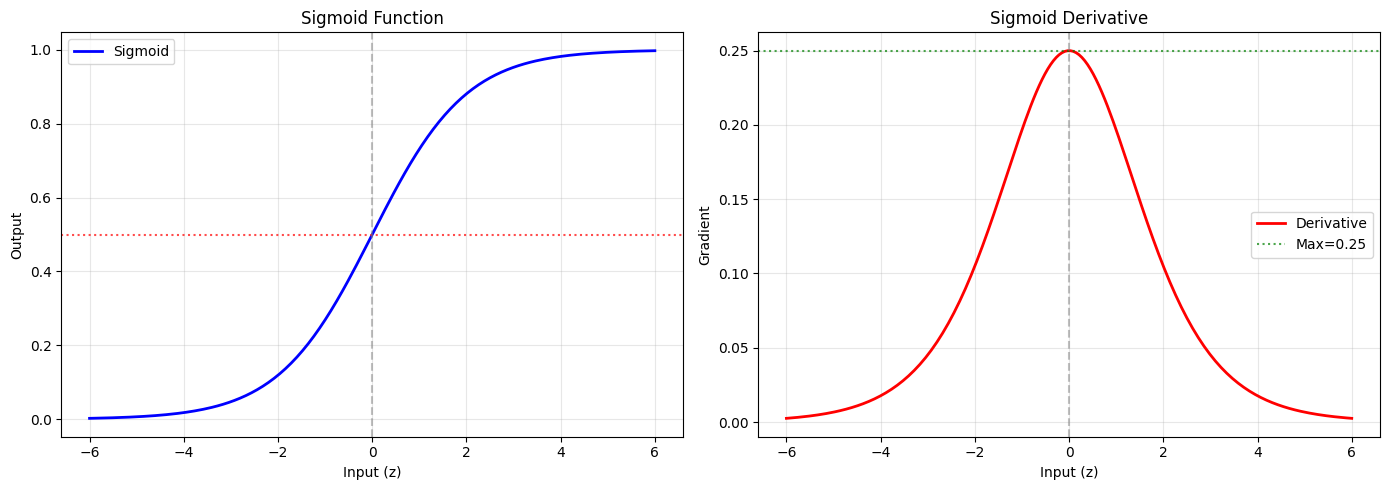

In [ ]:
# Create input range
z_range = np.linspace(-6, 6, 200)

# Compute outputs
y_sigmoid = sigmoid(z_range)
y_derivative = sigmoid_derivative(z_range)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Sigmoid function
ax1.plot(z_range, y_sigmoid, 'b-', linewidth=2, label='Sigmoid')
ax1.axhline(y=0.5, color='red', linestyle=':', alpha=0.7)
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Input (z)')
ax1.set_ylabel('Output')
ax1.set_title('Sigmoid Function')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Derivative
ax2.plot(z_range, y_derivative, 'r-', linewidth=2, label='Derivative')
ax2.axhline(y=0.25, color='green', linestyle=':', alpha=0.7, label='Max=0.25')
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel('Input (z)')
ax2.set_ylabel('Gradient')
ax2.set_title('Sigmoid Derivative')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/sigmoid_combined.png', dpi=150)
plt.show()

---

## Step 5: Numerical Analysis

In [12]:
# Test inputs as specified in problem
test_inputs = np.array([-5, -2, -0.5, 0, 0.5, 2, 5])

print("NUMERICAL ANALYSIS TABLE")
print("=" * 50)
print(f"{'Input':<10} {'Sigmoid':<15} {'Derivative':<15}")
print("-" * 40)

for z in test_inputs:
    print(f"{z:<10.1f} {sigmoid(z):<15.6f} {sigmoid_derivative(z):<15.6f}")

NUMERICAL ANALYSIS TABLE
Input      Sigmoid         Derivative     
----------------------------------------
-5.0       0.006693        0.006648       
-2.0       0.119203        0.104994       
-0.5       0.377541        0.235004       
0.0        0.500000        0.250000       
0.5        0.622459        0.235004       
2.0        0.880797        0.104994       
5.0        0.993307        0.006648       


---

## Step 6: Gradient Analysis

In [ ]:
print("GRADIENT ANALYSIS AT x = -2, 0, 2")
print("=" * 50)

for x in [-2, 0, 2]:
    grad = sigmoid_derivative(x)
    strength = "STRONG" if grad > 0.1 else "WEAK (vanishing)"
    print(f"At x = {x:>2}: Gradient = {grad:.6f} -> {strength}")

---

## 💼 Interview Perspective

### Common Questions

**Q: What is the range of sigmoid?**
A: Strictly between 0 and 1 (never exactly 0 or 1)

**Q: What is the maximum gradient of sigmoid?**
A: 0.25 at z=0

**Q: What is the vanishing gradient problem?**
A: Gradients become very small (0.25^n) across layers, stopping learning in early layers.

**Q: When to use sigmoid?**
A: Binary classification output layer only. Use ReLU for hidden layers.